# Проект: классификация

In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [431]:
url = r'D:\main\1_projects\educational_projects\project_5_banks_deposits\data\bank_fin.zip'
df = pd.read_csv(url, sep = ';')

In [432]:
# проверяем датасет на наличие пропусков
display(df.isnull().sum())
print('Признаки с пропусками')
df.isnull().sum()[df.isnull().sum() > 0]

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

Признаки с пропусками


balance    25
dtype: int64

### Задание 2

In [433]:
# в признаке job пропущенные значения обозначены специальным словом
df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

### Задание 3

In [434]:
# преобразовываем признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
# функция для преобразования
def balance_to_float(x):
    if isinstance(x, str):  # Проверяем, является ли x строкой
        return float(x.strip().replace(' ', '').replace('$', '').replace(',', '.'))
    return x  # Если не строка, просто возвращаем значение

df['balance'] = df['balance'].apply(balance_to_float)

### Задание 4

In [435]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df.balance.fillna(df.balance.median(), inplace=True)

### Задание 5

In [436]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
pop_job = df.job.mode()[0]
pop_edu= df.education.mode()[0]

df['job'] = df['job'].replace('unknown', pop_job)
df['education'] = df['education'].replace('unknown', pop_edu)

mask1 = df['job'] == pop_job
mask2 = df['education'] == pop_edu

df[mask1 & mask2]['balance'].mean()

np.float64(1598.8829787234042)

### Задание 6

In [437]:
# удаляем все выбросы для признака balance

# Находим первый (Q1) и третий (Q3) квартиль
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)

# Вычисляем межквартильный размах (IQR)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Нижняя граница: {lower_bound}')
print(f'Верхняя граница: {upper_bound}')

# Отфильтровываем данные, чтобы выбросов не осталось
filtered_df = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

# Проверка результатов
print(f'Количество строк до фильтрации: {len(df)}')
print(f'Количество строк после фильтрации: {len(filtered_df)}')

df = filtered_df

Нижняя граница: -2241.0
Верхняя граница: 4063.0
Количество строк до фильтрации: 11162
Количество строк после фильтрации: 10105


## Часть 2:  Разведывательный анализ

### Задание 1

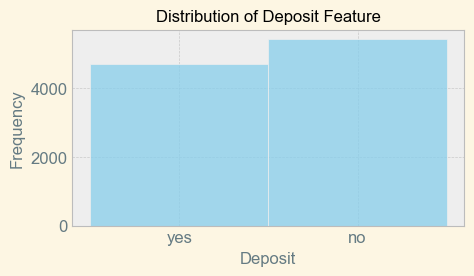

Количество клиентов, открывших депозит 4681
Количество клиентов, не открывших депозит 5424


In [438]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
plt.style.use('bmh')

# Настройка шрифта и его размера
plt.rc('font', family='Arial', size=12)
plt.rc('axes', titlesize=14, labelsize=12)  # Размер заголовков и подписей осей
plt.rc('legend', fontsize=12)  # Размер шрифта легенды
plt.rc('xtick', labelsize=12)  # Размер подписей по оси X
plt.rc('ytick', labelsize=12)  # Размер подписей по оси Y

fig, ax = plt.subplots(figsize=(4, 2))
# Построение гистограммы и плотности распределения с seaborn
sns.histplot(df['deposit'], color='skyblue', bins=20)
# Добавление заголовка и подписей осей
plt.title('Distribution of Deposit Feature', fontsize=12)
plt.xlabel('Deposit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Отображение графика
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f'Количество клиентов, открывших депозит {df[df['deposit'] == 'yes'].shape[0]}')
print(f'Количество клиентов, не открывших депозит {df[df['deposit'] != 'yes'].shape[0]}')

### Задания 2 и 3

In [439]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10105.0,40.895497,11.734931,18.0,32.0,38.0,48.0,95.0
balance,10105.0,807.653538,994.151966,-2049.0,95.0,445.0,1227.0,4063.0
day,10105.0,15.590302,8.441510,1.0,8.0,15.0,22.0,31.0
duration,10105.0,368.742603,346.651524,2.0,137.0,252.0,490.0,3881.0
campaign,10105.0,2.517170,2.707159,1.0,1.0,2.0,3.0,43.0
pdays,10105.0,51.319644,109.644179,-1.0,-1.0,-1.0,2.0,854.0
previous,10105.0,0.816230,2.243795,0.0,0.0,0.0,1.0,58.0


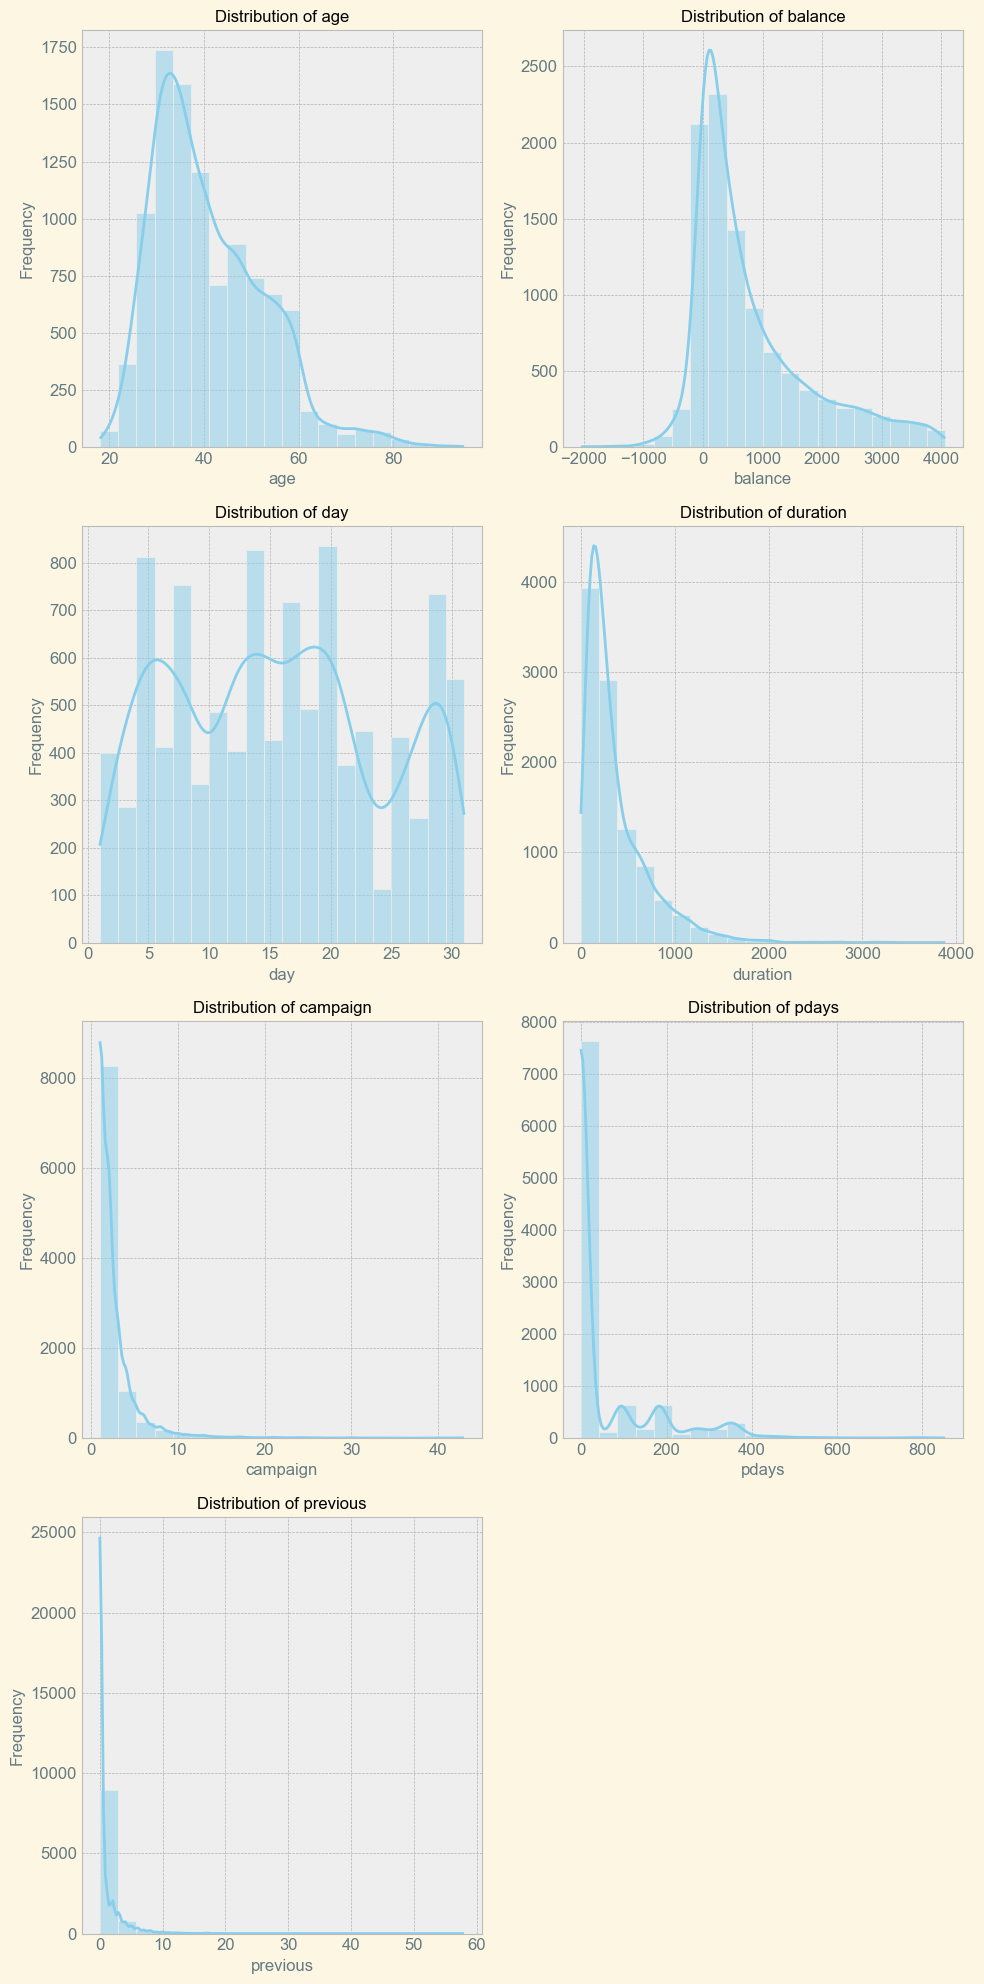

In [440]:
# Выбираем только числовые признаки (number)
numerical_columns = df.select_dtypes(include=['number']).columns

# Задаем количество столбцов и рассчитываем количество строк
n_cols = 2
n_rows = (len(numerical_columns) + 1) // n_cols

# Создаем сетку графиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))

# Перебираем числовые признаки
for i, col in enumerate(numerical_columns):
    row = i // n_cols  # Номер строки
    col_num = i % n_cols  # Номер столбца
    
    # Строим гистограмму на соответствующей оси
    sns.histplot(df[col], ax=axes[row, col_num], kde=True, bins=20, color='skyblue')
    axes[row, col_num].set_title(f'Distribution of {col}', fontsize=12)
    axes[row, col_num].set_xlabel(col)
    axes[row, col_num].set_ylabel('Frequency')

# Убираем пустые графики, если числовых признаков нечетное количество
if len(numerical_columns) % n_cols != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

### Задания 4 и 5

In [441]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
df.describe(include=object).T
#постройте визуализации, иллюстрирующие результаты

,count,unique,top,freq
job,10105,11,management,2315
marital,10105,3,married,5715
education,10105,3,secondary,5517
default,10105,2,no,9939
housing,10105,2,no,5243
loan,10105,2,no,8712
contact,10105,3,cellular,7283
month,10105,12,may,2617
poutcome,10105,4,unknown,7570
deposit,10105,2,no,5424


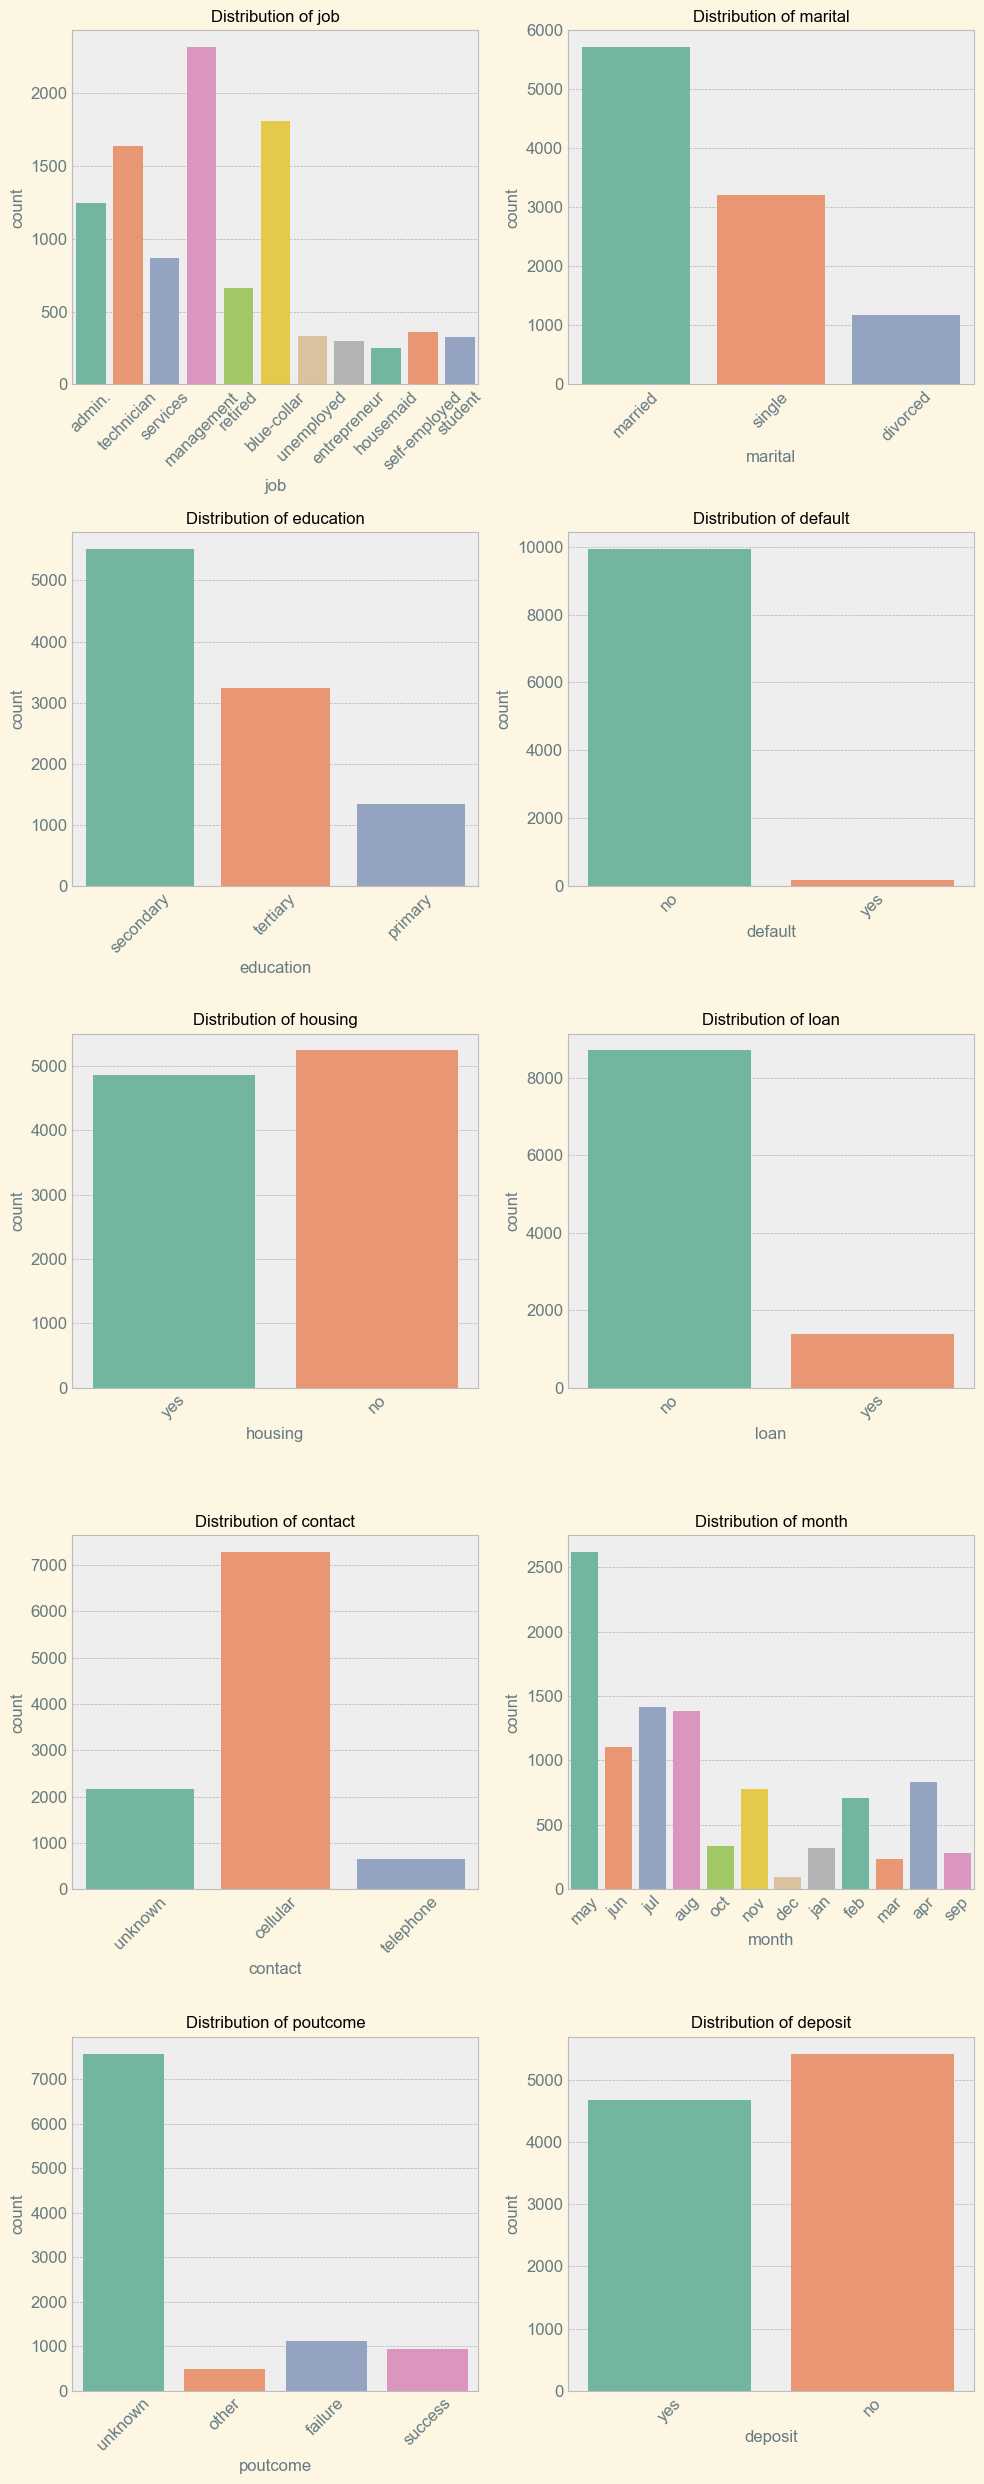

In [442]:
# Выбираем только категориальные признаки (object)
categorical_columns = df.select_dtypes(include=['object']).columns

# Задаем количество столбцов и рассчитываем количество строк
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols

# Создаем сетку графиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))

# Перебираем категориальные признаки
for i, col in enumerate(categorical_columns):
    row = i // n_cols  # Номер строки
    col_num = i % n_cols  # Номер столбца
    
    # Строим график на соответствующей оси
    sns.countplot(data=df, x=col, ax=axes[row, col_num], palette='Set2')
    axes[row, col_num].set_title(f'Distribution of {col}', fontsize=12)
    axes[row, col_num].tick_params(axis='x', rotation=45)

# Убираем пустые графики, если категориальных признаков нечетное количество
if len(categorical_columns) % n_cols != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

### Задание 6

In [443]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
df.groupby(['poutcome', 'deposit'])['deposit'].count()

poutcome  deposit
failure   no          562
          yes         547
other     no          216
          yes         265
success   no           84
          yes         861
unknown   no         4562
          yes        3008
Name: deposit, dtype: int64

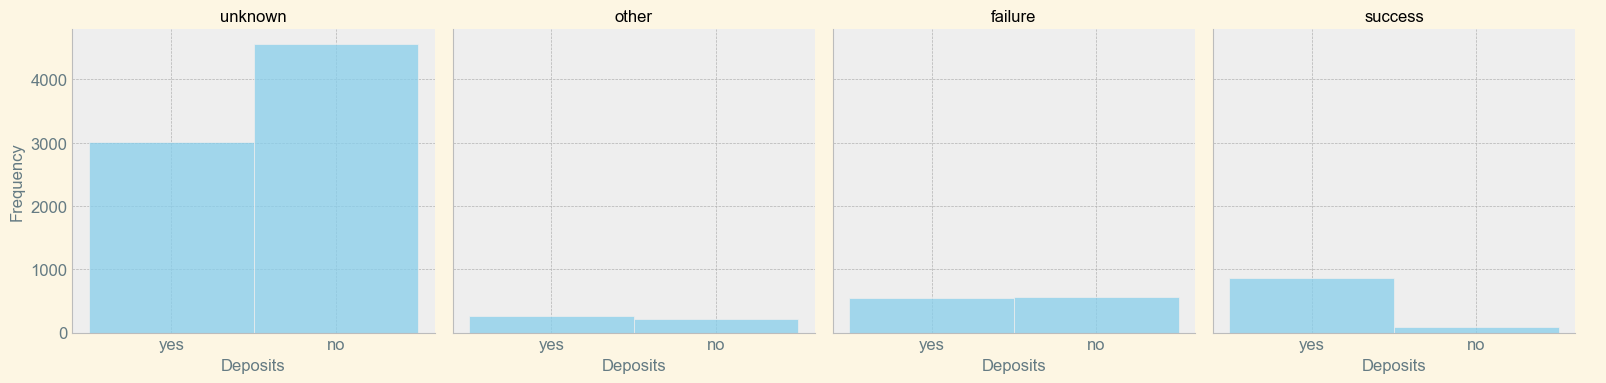

In [444]:
g = sns.FacetGrid(df, col='poutcome', height=4, aspect=1)
g.map(sns.histplot, 'deposit', bins=10, color='skyblue')

# Настройка графиков
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Deposits", "Frequency")
g.add_legend()

plt.show()

### Задание 7

In [445]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
count_df = df.groupby(['month', 'deposit']).size().reset_index(name='count')

# Подсчет общего количества записей для каждого месяца
total_counts = df['month'].value_counts().reset_index(name='total')
total_counts.columns = ['month', 'total']
# Объединение двух DataFrame для вычисления процентов
result = count_df.merge(total_counts, on='month')

# Вычисление процентов
result['percentage'] = (result['count'] / result['total']) * 100

# Вывод результата
result[result['deposit'] == 'no'].sort_values(by='percentage')

,month,deposit,count,total,percentage
4,dec,no,9,93,9.677419
14,mar,no,24,237,10.126582
22,sep,no,46,278,16.546763
20,oct,no,62,335,18.507463
0,apr,no,317,830,38.192771
6,feb,no,323,709,45.557123
12,jun,no,606,1104,54.891304
2,aug,no,775,1385,55.956679
18,nov,no,456,780,58.461538
10,jul,no,836,1418,58.956276


### Задание 8

In [446]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
# Определяем границы для возрастных групп
bins = [-float('inf'), 30, 40, 50, 60, float('inf')]
labels = ['<30', '30-40', '40-50', '50-60', '60+']

# Создаем новый столбец с возрастными группами
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

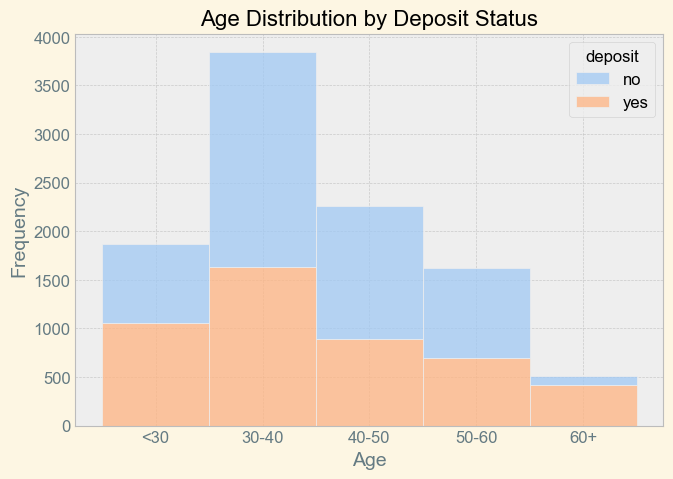

In [447]:
# Настройка графика
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age_group', hue='deposit', multiple='stack', bins=10, palette='pastel', hue_order=['no', 'yes'])

# Добавление заголовка и подписей осей
plt.title('Age Distribution by Deposit Status', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Отображение графика
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [448]:
count_df = df.groupby(['age_group', 'deposit']).size().reset_index(name='count')

# Подсчет общего количества записей для каждого месяца
total_counts = df['age_group'].value_counts().reset_index(name='total')
total_counts.columns = ['age_group', 'total']
# Объединение двух DataFrame для вычисления процентов
result = count_df.merge(total_counts, on='age_group')

# Вычисление процентов
result['percentage'] = (result['count'] / result['total']) * 100

# Вывод результата
result[result['deposit'] == 'yes'].sort_values(by='percentage')

,age_group,deposit,count,total,percentage
5,40-50,yes,895,2255,39.689579
3,30-40,yes,1627,3842,42.347736
7,50-60,yes,692,1625,42.584615
1,<30,yes,1051,1870,56.203209
9,60+,yes,416,513,81.091618


### Задания 9 и 10

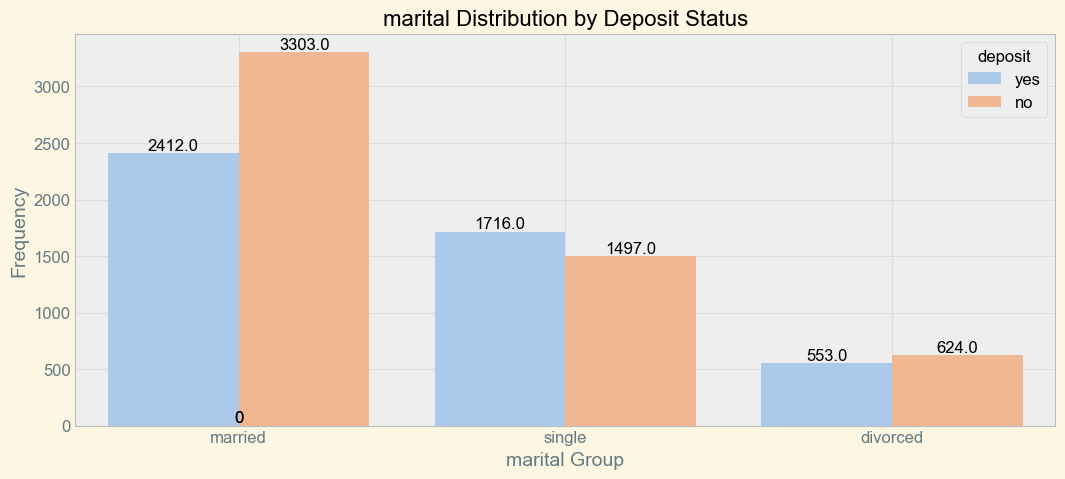

In [449]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
# Настройка графика
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='marital', hue='deposit', palette='pastel', hue_order=['yes','no'])

# Добавление подписей на столбцы
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12)

# Добавление заголовка и подписей осей
plt.title('marital Distribution by Deposit Status', fontsize=16)
plt.xlabel('marital Group', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Отображение графика
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

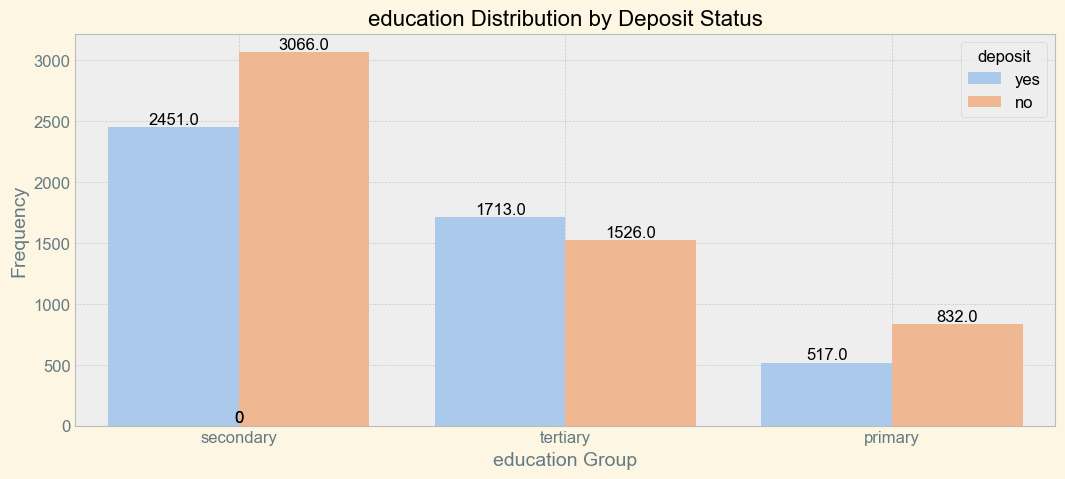

In [450]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
# Настройка графика
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='education', hue='deposit', palette='pastel', hue_order=['yes','no'])

# Добавление подписей на столбцы
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12)

# Добавление заголовка и подписей осей
plt.title('education Distribution by Deposit Status', fontsize=16)
plt.xlabel('education Group', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Отображение графика
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

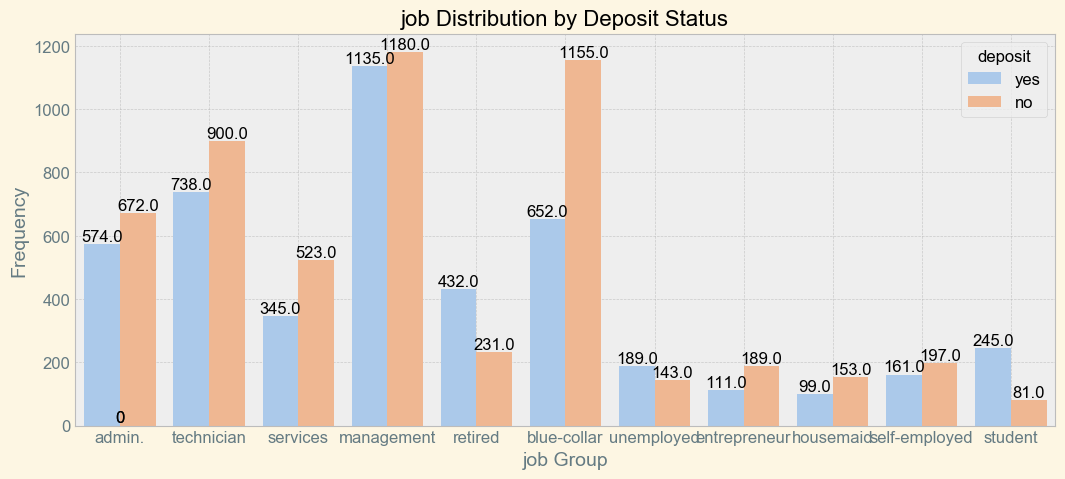

In [451]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
# Настройка графика
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='job', hue='deposit', palette='pastel', hue_order=['yes','no'])

# Добавление подписей на столбцы
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12)

# Добавление заголовка и подписей осей
plt.title('job Distribution by Deposit Status', fontsize=16)
plt.xlabel('job Group', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Отображение графика
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Задание 11

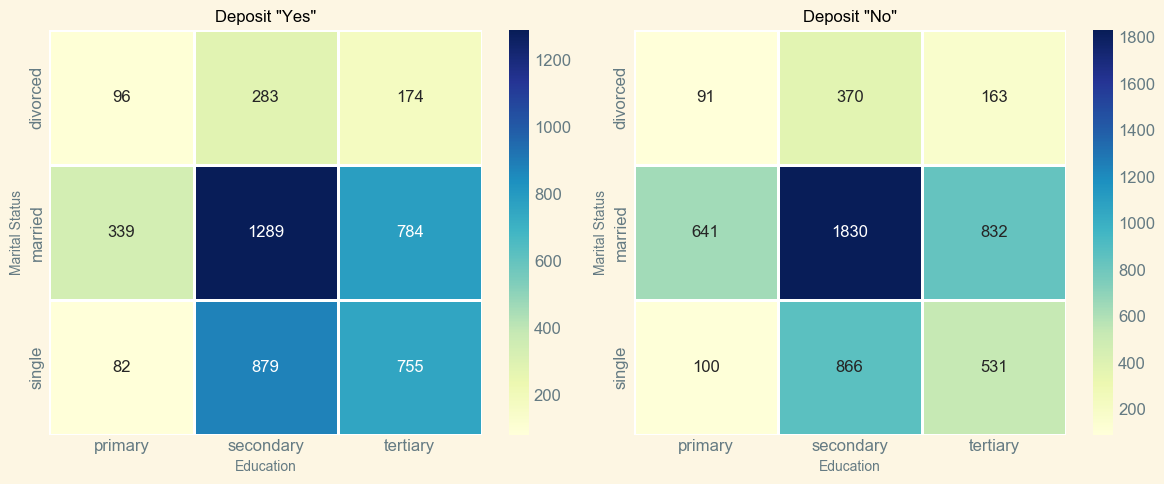

In [452]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# для тех, кто открыл депозит
pivot_table_yes = df[df['deposit'] == 'yes'].pivot_table(
    values='age',
    index=['marital'],
    columns='education',
    aggfunc='count'
)

# Построение тепловой карты
sns.heatmap(pivot_table_yes, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, ax=axes[0])
axes[0].set_title('Deposit "Yes"', fontsize=12)
axes[0].set_xlabel('Education', fontsize=10)
axes[0].set_ylabel('Marital Status', fontsize=10)


# для тех, кто не открыл депозит
pivot_table_no  = df[df['deposit'] == 'no'].pivot_table(
    values='age',
    index=['marital'],
    columns='education',
    aggfunc='count'
)

# Построение тепловой карты
sns.heatmap(pivot_table_no, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, ax=axes[1])
axes[1].set_title('Deposit "No"', fontsize=12)
axes[1].set_xlabel('Education', fontsize=10)
axes[1].set_ylabel('Marital Status', fontsize=10)

# Корректировка расстояния между графиками
plt.tight_layout()

# Отображение графиков
plt.show()

## Часть 3: преобразование данных

### Обработка признака: education.
С помощью метода LabelEncoder. 

In [453]:
# Создание объекта LabelEncoder
label_encoder = LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education'])

### Задания 2 и 3

In [454]:
# Преобразовываем deposits
mapping = {
    'no': 0,
    'yes': 1
}

df['deposit'] = df['deposit'].map(mapping)
df['default'] = df['default'].map(mapping)
df['housing'] = df['housing'].map(mapping)
df['loan'] = df['loan'].map(mapping)

### Задание 4

In [455]:
# создайте дамми-переменные
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'contact', 'month', 'poutcome'], drop_first=True)

### Задания 5 и 6

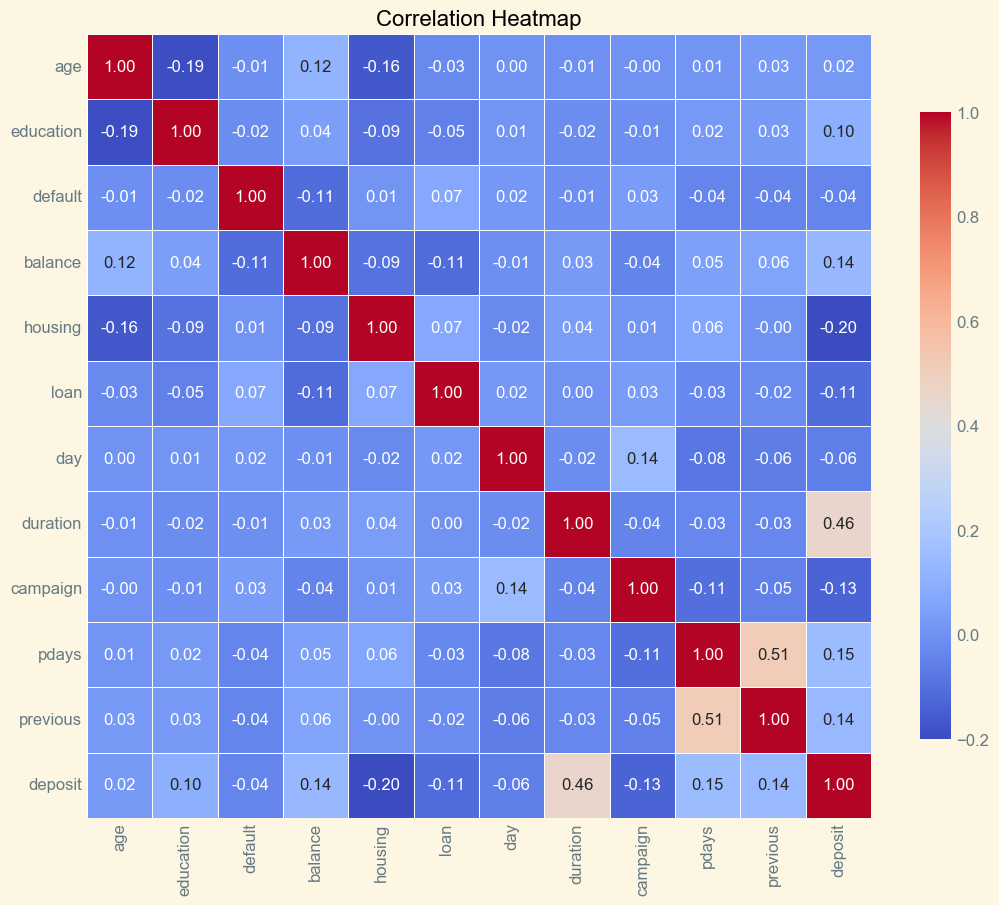

In [456]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
correlation = df_encoded.select_dtypes(include=['float64', 'int64']).corr()
# Настройка графика
plt.figure(figsize=(10, 8))
# Построение тепловой карты
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": .8})
# Добавление заголовка
plt.title('Correlation Heatmap', fontsize=16)
# Отображение графика
plt.show()

In [457]:
df_encoded.select_dtypes(include=['float64', 'int64', 'bool']).corr()['deposit'].sort_values(ascending=False).head()

deposit             1.000000
duration            0.457818
poutcome_success    0.288491
pdays               0.147917
previous            0.141102
Name: deposit, dtype: float64

### Задания 7 и 8

In [458]:
df = df_encoded.drop(['age_group'], axis=1)

In [459]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

### Задание 9

In [460]:
# Применение SelectKBest для выбора 15 лучших признаков
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train, y_train)

# Получение маски отобранных признаков
selected_features_mask = selector.get_support()

# Получение имен отобранных признаков
selected_features = X_train.columns[selected_features_mask]

# Вывод отобранных признаков
print("Отобранные признаки:")
print(selected_features)

Отобранные признаки:
Index(['balance', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'job_student', 'contact_unknown', 'month_mar', 'month_may',
       'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


### Задание 10

In [463]:
X_train[selected_features].head()

,balance,housing,loan,duration,campaign,pdays,previous,job_student,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
7287,557.0,1,0,513,1,-1,0,False,False,False,False,False,False,False,True
4766,69.0,0,1,296,1,205,2,False,False,False,False,False,False,False,False
5712,0.0,1,0,399,2,358,5,False,False,False,True,False,False,False,False
2530,444.0,0,0,137,1,102,5,True,False,False,False,False,False,True,False
9294,1444.0,0,0,100,1,117,8,False,False,False,False,False,False,True,False


In [472]:
# нормализуйте данные с помощью minmaxsxaler
from sklearn.preprocessing import MinMaxScaler

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

scaler = MinMaxScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

X_train_selected_scaled = pd.DataFrame(X_train_selected_scaled, columns=selected_features)
X_test_selected_scaled = pd.DataFrame(X_test_selected_scaled, columns=selected_features)

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [491]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# обучите логистическую регрессию и рассчитайте метрики качества
# Создание и обучение модели логистической регрессии
model_lr = LogisticRegression()
model_lr.fit(X_train_selected_scaled, y_train)

# Прогнозирование на тренировочной выборке
y_pred = model_lr.predict(X_test_selected_scaled)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.81
Confusion Matrix:
[[1542  248]
 [ 401 1144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      1790
           1       0.82      0.74      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.80      3335
weighted avg       0.81      0.81      0.80      3335



### Задания 2,3,4

In [492]:
# обучите решающие деревья, настройте максимальную глубину
from sklearn.tree import DecisionTreeClassifier
# Создание и обучение модели решающего дерева
model_dt = DecisionTreeClassifier(
    random_state=42,
    criterion='entropy'
    )
model_dt.fit(X_train_selected_scaled, y_train)

# Прогнозирование на тестовой выборке
y_pred = model_dt.predict(X_test_selected_scaled)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Вывод результатов

print(f'Тестовая выборка')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Тестовая выборка
Accuracy: 0.75
Confusion Matrix:
[[1372  418]
 [ 400 1145]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1790
           1       0.73      0.74      0.74      1545

    accuracy                           0.75      3335
   macro avg       0.75      0.75      0.75      3335
weighted avg       0.75      0.75      0.75      3335



In [493]:
# Прогнозирование на тестовой выборке
y_pred = model_dt.predict(X_train_selected_scaled)

# Оценка производительности модели
accuracy = accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)
class_report = classification_report(y_train, y_pred)

# Вывод результатов
print(f'Тренировочная выборка')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Тренировочная выборка
Accuracy: 1.00
Confusion Matrix:
[[3634    0]
 [   2 3134]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3634
           1       1.00      1.00      1.00      3136

    accuracy                           1.00      6770
   macro avg       1.00      1.00      1.00      6770
weighted avg       1.00      1.00      1.00      6770



### Задание 5

In [494]:
from sklearn.model_selection import GridSearchCV
# подберите оптимальные параметры с помощью gridsearch
# Задаем параметры для GridSearch
param_grid = {
    'max_depth': range(1, 21),  # Перебор глубин от 1 до 20
    'criterion': ['entropy']  # Используем энтропию в качестве критерия
}

# Создаем экземпляр модели
model_dt = DecisionTreeClassifier(random_state=42)

# Создаем GridSearchCV
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

# Обучаем GridSearchCV
grid_search.fit(X_train_selected_scaled, y_train)

# Определяем наилучшие параметры и модель
best_model = grid_search.best_estimator_
best_max_depth = grid_search.best_params_['max_depth']
best_accuracy = grid_search.best_score_

# Прогнозируем на тестовой выборке
y_test_pred = best_model.predict(X_test_selected_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Вывод результатов
print(f'Оптимальная максимальная глубина дерева: {best_max_depth}')
print(f'Точность на обучающей выборке (кросс-валидация): {best_accuracy:.2f}')
print(f'Точность на тестовой выборке: {test_accuracy:.2f}')

# Если нужно, вы можете вывести результаты для всех параметров
results = grid_search.cv_results_
for i in range(len(results['params'])):
    print(f"Depth: {results['params'][i]['max_depth']}, Mean Accuracy: {results['mean_test_score'][i]:.4f}")

Оптимальная максимальная глубина дерева: 6
Точность на обучающей выборке (кросс-валидация): 0.80
Точность на тестовой выборке: 0.80
Depth: 1, Mean Accuracy: 0.7171
Depth: 2, Mean Accuracy: 0.7566
Depth: 3, Mean Accuracy: 0.7761
Depth: 4, Mean Accuracy: 0.7780
Depth: 5, Mean Accuracy: 0.7885
Depth: 6, Mean Accuracy: 0.8004
Depth: 7, Mean Accuracy: 0.7976
Depth: 8, Mean Accuracy: 0.7994
Depth: 9, Mean Accuracy: 0.8003
Depth: 10, Mean Accuracy: 0.7991
Depth: 11, Mean Accuracy: 0.7950
Depth: 12, Mean Accuracy: 0.7908
Depth: 13, Mean Accuracy: 0.7904
Depth: 14, Mean Accuracy: 0.7866
Depth: 15, Mean Accuracy: 0.7832
Depth: 16, Mean Accuracy: 0.7792
Depth: 17, Mean Accuracy: 0.7737
Depth: 18, Mean Accuracy: 0.7742
Depth: 19, Mean Accuracy: 0.7710
Depth: 20, Mean Accuracy: 0.7650


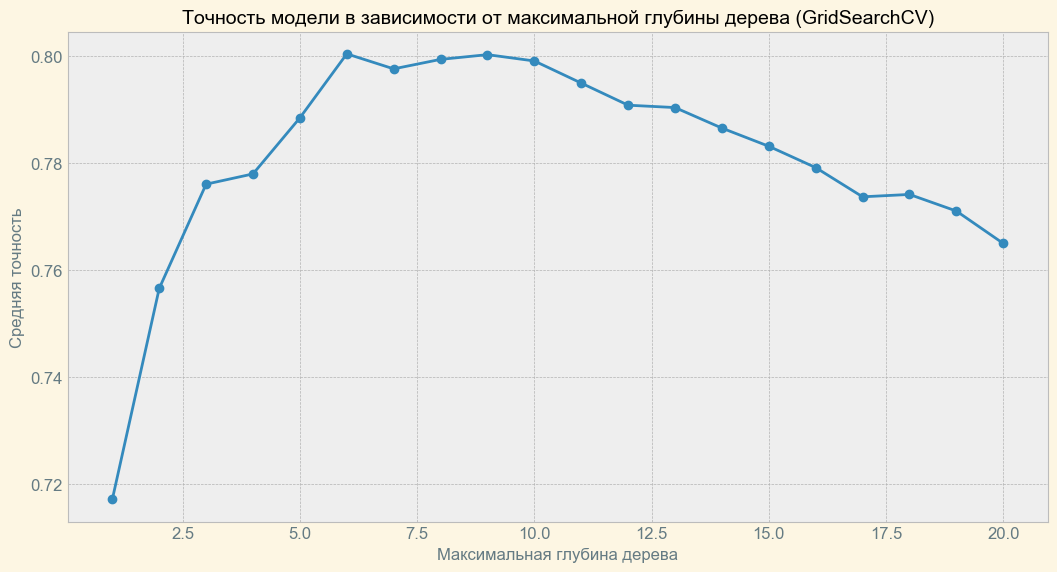

In [495]:
# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.plot(results['param_max_depth'], results['mean_test_score'], marker='o')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Средняя точность')
plt.title('Точность модели в зависимости от максимальной глубины дерева (GridSearchCV)')
plt.grid(True)
plt.show()

In [498]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
# подберите оптимальные параметры с помощью gridsearch
# Задаем параметры для GridSearch
param_grid = {
    'max_depth': [3,5,7], 
    'min_samples_split': [2, 5, 7, 10]  # Используем энтропию в качестве критерия
}

# Создаем экземпляр модели
model_dt = DecisionTreeClassifier(random_state=42)

# Создаем GridSearchCV
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, 
                           scoring='f1', n_jobs=-1)

# Обучаем GridSearchCV
grid_search.fit(X_train_selected_scaled, y_train)

# Определяем наилучшие параметры и модель
model_dt = grid_search.best_estimator_
best_max_depth = grid_search.best_params_['max_depth']
best_f1 = grid_search.best_score_

# Прогнозируем на тестовой выборке
y_test_pred = model_dt.predict(X_test_selected_scaled)
test_f1 = f1_score(y_test, y_test_pred)

# Вывод результатов
print(f'Оптимальная максимальная глубина дерева: {best_max_depth}')
print(f'F1 на обучающей выборке (кросс-валидация): {best_f1:.2f}')
print(f'F1 на тестовой выборке: {test_f1:.2f}')

# Если нужно, вы можете вывести результаты для всех параметров
# results = grid_search.cv_results_
# for i in range(len(results['params'])):
#     print(f"Depth: {results['params'][i]['max_depth']}, Mean Accuracy: {results['mean_test_score'][i]:.4f}")

Оптимальная максимальная глубина дерева: 7
F1 на обучающей выборке (кросс-валидация): 0.80
F1 на тестовой выборке: 0.79


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [500]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
# обучите на ваших данных случайный лес
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева
model_rf = RandomForestClassifier(
    n_estimators=10, #количество деревьев в ансамбле
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)

model_rf.fit(X_train_selected_scaled, y_train)
y_pred = model_rf.predict(X_test_selected_scaled)

print(f'Accuracy на тестовой выборке: {accuracy_score(y_test, y_pred):.2f}')
print(f'Recall на тестовой выборке: {recall_score(y_test, y_pred):.2f}')


Accuracy на тестовой выборке: 0.83
Recall на тестовой выборке: 0.84


### Задания 2 и 3

In [501]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(
    learning_rate = 0.05,
    n_estimators=300, #количество деревьев в ансамбле
    min_samples_leaf = 5,
    max_depth = 5,
    random_state=42 #датчик генератора случайных чисел
)

model_gb.fit(X_train_selected_scaled, y_train)
y_pred = model_gb.predict(X_test_selected_scaled)

print(f'F1 на тестовой выборке: {f1_score(y_test, y_pred):.2f}')


F1 на тестовой выборке: 0.82


### Задание 4

In [504]:
# объедините уже известные вам алгоритмы с помощью стекинга 
from sklearn.ensemble import StackingClassifier

#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', model_lr),
    ('dt',  model_dt),
    ('gb', model_gb)
]

# Создаем объект класса стекинг
model_stack_cl = StackingClassifier(
    estimators=estimators, #базовые модели в стекинге
    final_estimator=LogisticRegression() #метамодель
)
# Обучаем модель
model_stack_cl.fit(X_train_selected_scaled, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt',
                                DecisionTreeClassifier(max_depth=7,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           min_samples_leaf=5,
                                                           n_estimators=300,
                                                           random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# объедините уже известные вам алгоритмы с помощью стекинга 
from sklearn.ensemble import StackingClassifier

#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', model_lr),
    ('dt',  model_dt),
    ('rf', model_rf),
    ('gb', model_gb)
]

# Создаем объект класса стекинг
model_stack_cl = StackingClassifier(
    estimators=estimators, #базовые модели в стекинге
    final_estimator=LogisticRegression() #метамодель
)
# Обучаем модель
model_stack_cl.fit(X_train_selected_scaled, y_train)

In [507]:
from sklearn.metrics import precision_score
y_pred = model_stack_cl.predict(X_test_selected_scaled)
print(f'F1 на тестовой выборке: {f1_score(y_test, y_pred):.3f}')
print(f'precision_score на тестовой выборке: {precision_score(y_test, y_pred):.3f}')

F1 на тестовой выборке: 0.812
precision_score на тестовой выборке: 0.811


### Задание 5

In [511]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
# Оценка важности признаков
feature_importances = model_gb.feature_importances_
# Создание таблицы с важностью признаков
feature_importance_df = pd.DataFrame({
    'Feature': X_train_selected_scaled.columns,
    'Importance': feature_importances
})
# Сортировка признаков по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Вывод наиболее важных признаков
print(feature_importance_df)

             Feature  Importance
3           duration    0.512996
13  poutcome_success    0.117808
8    contact_unknown    0.079413
0            balance    0.061744
5              pdays    0.055392
1            housing    0.049387
9          month_mar    0.027306
11         month_oct    0.018960
4           campaign    0.017227
12         month_sep    0.015689
10         month_may    0.014792
2               loan    0.012288
6           previous    0.008288
7        job_student    0.005803
14  poutcome_unknown    0.002906


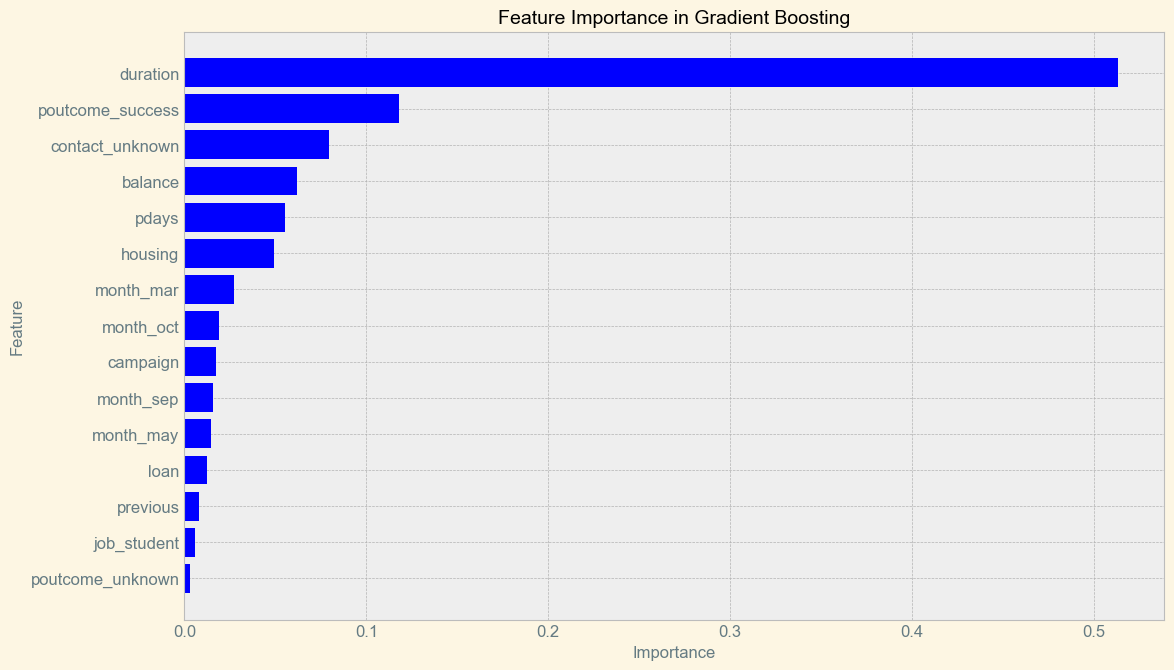

In [512]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='b')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting')
plt.gca().invert_yaxis()  # Для того, чтобы важные признаки были сверху
plt.show()

### Задания 6,7,8

In [516]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
import optuna

def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train_selected_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_selected_scaled))

  return score

# %%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

[I 2024-10-24 22:03:09,783] A new study created in memory with name: RandomForestClassifier
[I 2024-10-24 22:03:10,474] Trial 0 finished with value: 0.8710385942893003 and parameters: {'n_estimators': 127, 'max_depth': 16, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8710385942893003.
[I 2024-10-24 22:03:11,121] Trial 1 finished with value: 0.8874255252430229 and parameters: {'n_estimators': 112, 'max_depth': 26, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8874255252430229.
[I 2024-10-24 22:03:11,624] Trial 2 finished with value: 0.856829230045476 and parameters: {'n_estimators': 106, 'max_depth': 11, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8874255252430229.
[I 2024-10-24 22:03:12,438] Trial 3 finished with value: 0.8516149165236386 and parameters: {'n_estimators': 182, 'max_depth': 18, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.8874255252430229.
[I 2024-10-24 22:03:13,455] Trial 4 finished with value: 0.8571428571428571 and parameters: {'n_e

Наилучшие значения гиперпараметров {'n_estimators': 143, 'max_depth': 22, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.91


In [517]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train_selected_scaled, y_train)

y_test_pred = model.predict(X_test_selected_scaled)
print(f'accuracy на тестовой выборке: {accuracy_score(y_test, y_test_pred):.3f}')
print(f'f1_score на тестовой выборке: {f1_score(y_test, y_test_pred):.3f}')

accuracy на тестовой выборке: 0.823
f1_score на тестовой выборке: 0.814
